<a href="https://colab.research.google.com/github/tanaybag/GRIPMAY21_TASKS/blob/main/Task%201%3A%20Prediction%20using%20Supervised%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP**

## **Data Science & Business Analytics Intern - May'21**

### **Task 1: Prediction using Supervised Machine Learning**

**AIM - Predict the percentage of an student based on the number of study hours. Find the predicted score if a student studies for 9.25 hrs/day. This is a simple linear regression task as it involves just two variables.**

## Author: Tanay Bag

### *STEP 1: IMPORTING THE STANDARD LIBRARIES*

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline

### *STEP 2: READING THE DATA FROM THE LINK PROVIDED*

In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head(10) #displays the first 10 rows of the data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### *STEP 3: VISUALIZING THE DATA USING SCATTER PLOT*

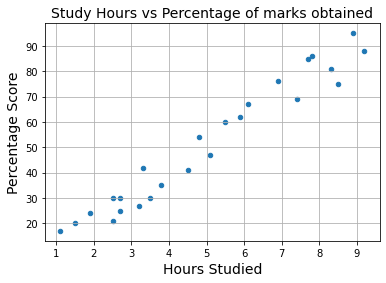

In [ ]:
data.plot(x='Hours', y='Scores',kind='scatter')  
plt.title('Study Hours vs Percentage of marks obtained',fontsize=14)  
plt.xlabel('Hours Studied',fontsize=14)  
plt.ylabel('Percentage Score',fontsize=14) 
plt.grid(True)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. Hence, we build a Linear regression model**

### **STEP 4: DIVIDING THE DATA INTO ATTRIBUTES AND LABELS i.e. PREPARING THE DATA**
Here the attributes refer to number of hours studied and label refers to the scores of students

In [ ]:
x= data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("Values of x",x)
print("Values of y",y)

Values of x [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Values of y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### STEP 5: SPLITTING DATA INTO TRAINING AND TEST SETS
*Using Scikit-Learn's built in train_test_split() method:*

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### **STEP 6: TRAINING THE ALGORITHM**
*We have split our data into training and testing sets, and now is finally the time to train our algorithm.* 

In [ ]:
lm =linear_model.LinearRegression()  
model=lm.fit(x_train, y_train) 
print("Intercept: \n",model.intercept_)
print("Coefficient: \n",model.coef_)
print("Training complete.")

Intercept: 
 2.018160041434662
Coefficient: 
 [9.91065648]
Training complete.


### STEP 7: VISUALIZATION OF REGRESSION LINE 
*REGRESSION LINE IS GIVEN BY: y=coefficient*x + intercept*
*THUS IT WILL BE*
*y=9.91065648x +2.01816000414134683*

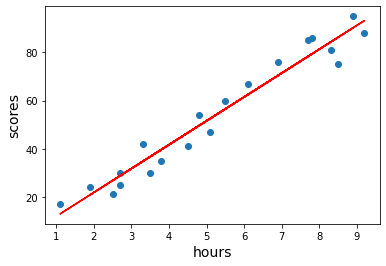

In [ ]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)
plt.plot(x_train,lm.predict(x_train),color='RED');
plt.xlabel("hours",fontsize=14)
plt.ylabel("scores",fontsize=14)
plt.show()

### **STEP 8: PREDICTING SCORES FOR STUDYING 9.25hrs/DAY**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print("number of hours=9.25") # Testing data - In Hours
y_predicted_value=lm.predict([[9.25]])
print("Predicted score=",format(y_predicted_value[0])) # Predicting the scores

number of hours=9.25
Predicted score= 93.69173248737539


### **STEP 9: PREDICTING AND TESTING**

In [ ]:
print(x_test)#test data
y_predicted_value= model.predict(x_test)#predicted data
df = pd.DataFrame({'Actual': y_test,'Predicted': y_predicted_value})#comparing actual vs predicted data
df 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **STEP 10:EVALUATING THE MODEL**

**The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset.
For simplicity here, we have chosen the R-square metric for evaluation.**

In [ ]:
x=sm.add_constant(x)
mode=sm.OLS(y,x).fit()
predictions=mode.predict(x)
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 11 May 2021   Prob (F-statistic):           9.13e-17
Time:                        06:59:10   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

**THE R-SQUARED VALUE IS 0.953 WHICH MEANS EXPLAINED VARIABILITY OF THE MODEL y=9.91065648x +2.01816000414134683 IS 95.3%**